<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe6-Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de selección

**Entrada**: Conjunto $A$ con $n$ números diferentes más un índice $i$.

**Salida**: Elemento $x \in A$, que es mayor exactamente a $i-1$ elementos de $A$.

El problema de selección consiste en encontrar el i-ésimo elemento más pequeño de una lista. Este valor también se conoce como **estadístico de orden $i$**, y se aplica en una gran variedad de algoritmos. Existen estadísticos de orden especiales. Por ejemplo, el menor elemento corresponde al estadístico de orden $i = 1$, mientras que el mayor elemento corresponde al estadístico de orden $n$-ésimo. Otro estadístico de orden bastante conocido es la **mediana**, que podemos definir informalmente como el punto medio de un conjunto de valores.

Existen infinitas formas de resolver el problema de selección. Por ejemplo, podríamos resolver fácilmente este problema en tiempo $O(n^2)$, recorriendo el arreglo $i$ veces y guardando en cada iteración $i$ el estadístico de orden $i$-ésimo. Luego, en la siguiente iteración, se buscaría el menor elemento que sea mayor al estadístico de orden encontrado en la iteración anterior, hasta encontrar el estadístico de orden buscado. Otra forma de resolver este problema consiste en ordenar los elementos, convenientemente con un algoritmo de complejidad temporal $O(n\log{n})$, y luego obtener el estadístico de orden $i$-ésimo accediendo al elemento ubicado en la posición $i$-ésima.

La solución abordada en este informe presenta una complejidad temporal de $O(n)$, siendo más eficiente que los algoritmos antes mencionados.





# 2. Select

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **Select**, el cual retorna el **estadístico de orden $i$-ésimo** de un conjunto de $n$ elementos.

In [41]:
def insertion_sort(A):
  # Variable global para contar las comparaciones
  global c

  for i in range(1, len(A)):
    j = i; c += 1
    
    # Mientras j > 0 y el elemento anterior sea mayor al actual
    while j > 0 and A[j] < A[j - 1]:
      # Se intercambian los elementos
      A[j], A[j - 1] = A[j - 1], A[j]
      j -= 1

    if j > 0: c += 1

  return A

In [40]:
def pivot_selection(A):
  # Arreglo de medianas
  M = []

  # Se recorre cada subgrupo de 5 elementos del arreglo
  for i in range(0, len(A)//5):
    ini = i*5
    fin = ini+5

    # Se ordena cada subgrupo y se obtiene la mediana
    B = insertion_sort(A[ini:fin])
    M.append(B[2])

  # Se aplica el mismo procedimiento con los elementos restantes
  if len(A) % 5 != 0:
    B = insertion_sort(A[len(A)//5*5:len(A)])
    M.append(B[(len(B)-1)//2])

  # Se retorna la mediana encontrada
  if len(M) == 1: return M[0]

  # Si hay más de una mediana se repite el procedimiento
  return pivot_selection(M)

In [63]:
def partition(A, p):
  # Se intercambia pivote con el último elemento
  A[p], A[len(A)-1] = A[len(A)-1], A[p]
  p = len(A)-1

  # Se particiona el arreglo
  i = -1
  for j in range(len(A)-1):
    if A[j] <= A[p]:
      A[j], A[i+1] = A[i+1], A[j]
      i += 1

  # Se mueve el pivote a su posición correspondiente
  A[p], A[i+1] = A[i+1], A[p]

  # Se retorna la posición final del pivote
  return i+1

In [126]:
def select(A, i,):
  # Se retorna el único elemento del arreglo
  if len(A) == 1: return A[0]

  # Se ajusta estadístico de orden [1...n] con posición del pivote [0...n-1]
  k = i - 1

  # Se selecciona el pivote y se encuentra su posición en el arreglo
  m = pivot_selection(A)
  p = A.index(m)

  # Se realiza la partición del arreglo
  q = partition(A, p)

  # La posición del pivote coincide con el estadístico de orden
  if k == q: return A[q]

  # Estadístico de orden se encuentra en la partición izquierda
  if k < q: return select(A[:q], i)

  # Estadístico de orden se encuentra en la partición derecha
  return select(A[q+1:], k-q)

A = [12,17,26,8,30,18,21,5,10,24]
#A = [18, 26, 14, 38, 83, 59, 57, 17, 62, 20, 32, 19, 55, 71, 47]
i = 3; c = 0

# Busco el estadístico de orden i-ésimo
x = select(A, i)

print(f"El estadístico de orden {i} es {x}")
print(f"Comparaciones: {c}")

El estadístico de orden 3 es 10
Comparaciones: 21


## 2.2 Descripción del algoritmo

La entrada consiste en un arreglo $A$ de $n$ elementos **distintos**, más un parámetro $i$ para buscar el estadístico de orden $i$-ésimo dentro del arreglo. Los pasos realizados por el algoritmo son los siguientes:

1. Se encuentra una mediana $m$ para el arreglo $A$ mediante la función `pivot_selection`.

2. La función `partition` divide el arreglo $A$ en dos partes iguales a partir del pivote $m$. La partición izquierda contendrá todos los elementos menores a $m$, mientras que la partición derecha estará formada por los elementos mayores.

3. Elegimos la partición que contenga el $i$-ésimo menor elemento.

4. Repetimos los pasos anteriores con la nueva partición hasta que la posición de $m$ luego de llamar a `partition` sea igual a $i$.

5. Finalmente retornamos el valor $A[i]$, que corresponderá al estadístico de orden $i$-ésimo dentro del conjunto de entrada.

Los pasos realizados por la función `pivot_selection` son los siguientes:

1. Se divide el arreglo en grupos de 5 elementos cada uno (el último grupo puede quedar con menos elementos).

2. Cada sub-arreglo se ordena mediante Insertion Sort.

3. Se obtiene la mediana de cada sub-arreglo.

4. Se llama recursivamente a la función `pivot_selection` para encontrar la mediana $m$ de las medianas identificadas en el paso anterior.  


## 2.3 Ejemplo

Supongamos que queremos encontrar el estadístico de orden 9 del siguiente arreglo de entrada:

![picture](https://drive.google.com/uc?export=view&id=1nijNMQHeOKGp5lKnoPKT_xSi87X57eIx)

En primer lugar, debemos encontrar la mediana que posteriormente nos permitirá particionar el arreglo. Para ello llamamos a la función `pivot_selection`, que dividirá el arreglo en grupos de 5, los ordenará y encontrará la mediana para cada uno de ellos.

![picture](https://drive.google.com/uc?export=view&id=1ya1IwxFSCTdNoAxyNMo_Oo1ERgO7n_VU)

Luego debemos encontrar la mediana $m$ de las medianas resultantes del paso anterior. Para ello, llamamos recursivamente a la misma función:

![picture](https://drive.google.com/uc?export=view&id=1x0yFg_uN2k8EmzQ-7ahtuv-I2xkvcQpu)

De este modo obtenemos la mediana $m = 11$, valor a partir del cual particionaremos el arreglo inicial mediante la función `partition`. Los elementos menores a $m$ quedaran a la izquierda y los mayores a la derecha:

![picture](https://drive.google.com/uc?export=view&id=1TpAd0CzUh26XO5lO3jE8rX6J07-pkwpp)

Nos quedamos con la partición que contenga el estadístico de orden buscado, en este caso 9. Sabemos que $m$ corresponde al estadístico de orden 7, por lo tanto, elegimos la partición derecha.

Luego, repetimos los pasos anteriores para esta partición, empezando por encontrar la mediana de estos elementos mediante la función `pivot_selection`:

![picture](https://drive.google.com/uc?export=view&id=1jhcrJrDcvk24MeBWGZ5bMtU3qolEKE3v)

Llamamos recursivamente a la función. En este caso, consideraremos que la mediana de un conjunto de elementos par, será simplemente el primero de los dos elementos intermedios:

![picture](https://drive.google.com/uc?export=view&id=15yOVx2Zq5ZmkLIWgKZgdgQY8d-JmX9MO)

Luego de obtener el valor de la mediana para esta partición, volvemos a dividir este conjunto, considerando el pivote $m = 20$:

![picture](https://drive.google.com/uc?export=view&id=1YPEOxMcZ3UJgY8Mk-Dv_zHzeVi5V4zpT)

El estadístico de orden 9 se encuentra a la izquierda, por lo tanto, trabajaremos con esta partición. Nuevamente calculamos la mediana de estos elementos:

![picture](https://drive.google.com/uc?export=view&id=1DfsklsGnC3GNFNSWiWW4PoJu7hTav6gd)

Dividimos la partición considerando el pivote $m = 14$:

![picture](https://drive.google.com/uc?export=view&id=1uBelk0clmzL7HOm14xXCXpmyTdmZPVXD)

Finalmente, observemos que la posición resultante del pivote coincide con el estadístico de orden que estamos buscando, por lo tanto, retornamos el valor correspondiente a esta posición, en este caso, 14.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Añadiendo la opción `verbose=True`, podemos ver lo que ocurre en cada paso del algoritmo.

In [121]:
from termcolor import colored

def select_verbose(A, i, verbose=False, first_call=True):
  if len(A) == 1:

    if verbose == True:
      print(f"Retornando el único elemento del arreglo\n")
      print(f"Salida: {A[0]}")

    return A[0]

  if verbose == True:

    if first_call == True:
      print(f"Entrada: {A}")
      print(f"Buscando estadístico de orden {i}\n")   

    else: print(f"Llamando recursivamente a select con A = {A}\n")

  k = i - 1
  m = pivot_selection(A)
  p = A.index(m)
  q = partition(A, p)

  if verbose == True:
    print(f"Obteniendo mediana m = {colored(m, 'magenta')}")
    print(f"Particionando arreglo: [", end='')

    if q != 0: print(colored(str(A[:q])[1:-1] + ', ', 'blue'), end='')
    print(colored(A[q], 'magenta'), end='')

    if q + 1 != len(A): print(colored(', ' + str(A[q+1:])[1:-1], 'red'), end='')
    print("]")

  if k == q: 

    if verbose == True:
      print(f"Posición del pivote coincide con estadístico de orden {i}\n")
      print(f"Salida: {A[q]}")

    return A[q]

  if k < q:

    if verbose == True:
      print("Elemento se encuentra en partición izquierda: ", end='')
      print(colored(A[0:q], "blue"), end='\n\n')

    return select_verbose(A[:q], i, verbose, False)

  print("Elemento se encuentra en partición derecha: ", end='')
  print(colored(A[q+1:], "red"))
  print(f"Actualizando valor de estadístico de orden a {k-q}", end='\n\n')

  return select_verbose(A[q+1:], k-q, verbose, False)

In [147]:
import random
A = random.sample(range(1, 100), 15)
n = select_verbose(A, 5, verbose=True)

Entrada: [8, 33, 9, 79, 92, 81, 47, 37, 59, 87, 95, 86, 32, 30, 50]
Buscando estadístico de orden 5

Obteniendo mediana m = 50
Particionando arreglo: [8, 33, 9, 47, 37, 32, 30, 50, 59, 87, 95, 86, 81, 79, 92]
Elemento se encuentra en partición izquierda: [8, 33, 9, 47, 37, 32, 30]

Llamando recursivamente a select con A = [8, 33, 9, 47, 37, 32, 30]

Obteniendo mediana m = 30
Particionando arreglo: [8, 9, 30, 47, 37, 32, 33]
Elemento se encuentra en partición derecha: [47, 37, 32, 33]
Actualizando valor de estadístico de orden a 2

Llamando recursivamente a select con A = [47, 37, 32, 33]

Obteniendo mediana m = 33
Particionando arreglo: [32, 33, 47, 37]
Posición del pivote coincide con estadístico de orden 2

Salida: 33


# 3. Correctitud

### **Teorema 1 (Correctitud de Select).**

*El algoritmo Select retorna el i-ésimo menor elemento de un arreglo de tamaño $n$, considerando que $1 \leq i \leq n$*

## Prueba del Teorema

Para demostrar la correctitud del algoritmo, intentaremos demostrar la hipótesis $P(n)$ utilizando inducción.

**Caso base**

Para $n = 1$, por la condición planteada en el teorema, se cumple necesariamente que $i = 1$, por lo tanto, estaremos buscando el menor elemento. En este caso, el algoritmo retorna el único elemento del arreglo, que coincide trivialmente con el elemento más pequeño.

**Paso inductivo**

Para $n > 1$, la función `partition` divide el arreglo en dos mitades a partir de un pivote, dejando los elementos menores a la izquierda, y los mayores a la derecha. Sea $q$ la posición final del pivote luego de reordenar el arreglo, podemos decir que el pivote corresponde al estadístico de orden $q$-ésimo del arreglo. Luego, existen 3 casos:

1. Si $i < q$, el estadístico de orden se encuentra en la partición izquierda, y se repite el algoritmo para esta partición.

2. Si $i > q$, el estadístico de orden se encuentra en la partición derecha, y se repite el algoritmo para esta partición. Puesto que el tamaño de este sub-arreglo es igual a $n - q$, es necesario ajustar el estadístico de orden buscado a $i - q$

3. Si $i = q$, el estadístico de orden corresponde al pivote, por lo tanto, se retorna este elemento.

Observemos que en los primeros dos casos, se repite el algoritmo para un sub-arreglo de tamaño $m$. Luego, por el paso inductivo, sabemos que la hipótesis $P(m)$ es cierta para cualquier $m < n$.

Como la hipótesis se cumple para el **caso base** y para el **paso inductivo**, queda demostrada la correctitud del algoritmo Select. $\Box$




# 4. Tiempo de ejecución

### **Teorema 2 (Tiempo de ejecución del algoritmo Select)**

*El algoritmo Select tiene un **tiempo de ejecución** $\Theta(n)$*

## Prueba del teorema

Debido a la naturaleza recursiva del algoritmo, podemos expresar su tiempo de ejecución mediante una **función de recurrencia** $T(n)$. Para ello, analizaremos individualmente cada operación realizada por el algoritmo.

En primer lugar, se llama a la función `pivot-selection` que retornará un pivote óptimo para particionar el arreglo. A continuación se presenta el análisis de tiempo para cada procedimiento de la función:

1. Dividir el arreglo en $⌊n/5⌋$ grupos de 5 elementos y como máximo 1 grupo con los elementos restantes tiene un tiempo de ejecución $O(n)$

2. Encontrar la mediana para cada grupo ordenando los elementos con Insertion Sort tiene un tiempo de ejecución **total** de $O(n)$

4. Encontrar la mediana de las $\lceil n/5 \rceil$ medianas identificadas en el paso anterior tiene un tiempo de ejecución $T(\lceil n/5 \rceil)$.

Luego de encontrar el pivote, se llama a la función `partition`, la cual reordena los elementos del arreglo de modo que los valores menores al pivote se ubiquen a la izquierda, y los valores mayores a la derecha. El tiempo de ejecución de esta función es $O(n)$.

Finalmente, se llama recursivamente a la función `select` para repetir el algoritmo con la partición en donde se encuentra el estadístico de orden buscado. Observemos que la cantidad de elementos a procesar en cada llamada recursiva dependerá de la partición escogida, lo que a su vez dependerá del pivote obtenido por la función `pivot-selection`.

Notemos que la mediana $m$ de todas las medianas obtenidas por la función `pivot-selection` es mayor a la mitad de las medianas. Luego, $m$ es mayor a los elementos ubicados a la izquierda de estas medianas. Es decir, la mitad de grupos contiene al menos 3 elementos menores a la mediana $m$. En general, la cantidad de elementos menores a $m$ en un arreglo de $n$ elementos es igual a:

$3 \cdot \frac{n}{5} \cdot \frac{1}{2} = \frac{3n}{10}$

Por lo tanto, una vez se divide el arreglo por la función `partition`, en el peor caso se formarán dos particiones con $\frac{3n}{10}$ y $\frac{7n}{10}$ elementos respectivamente. Para analizar el peor caso del algoritmo Select, consideremos que se elige la partición de $\frac{7n}{10}$ elementos.

Luego, la función de recurrencia $T(n)$ queda expresada de la siguiente manera:

$T(n) = T(\lceil \frac{n}{5} \rceil) + T(\frac{7n}{10}) + O(n)$

Utilizaremos el **método de sustitución** para demostrar que la complejidad del algoritmo es $O(n)$. Reemplazamos en la recursión los valores de $T(n)$ por $dn$ y la complejidad $O(n)$ por $cn$. Luego, debemos demostrar que $T(n) \leq dn$ para algún valor $d > 0$.

$\frac{dn}{5} + \frac{7dn}{10} + cn \leq dn$

Resolviendo la inecuación, obtenemos que para cualquier valor $d \geq 10c$ se cumple que $T(n) \leq dn$. Luego, podemos afirmar que el algoritmo select tiene un tiempo de ejecución $O(n)$ en el peor caso. 

Por otro lado, la mayoría de operaciones no recursivas del algoritmo poseen una complejidad $\Omega(n)$. Es decir, los límites asintóticos superior e inferior de la función $T(n)$ son iguales. Luego, el tiempo de ejecución del algoritmo **Select** se puede expresar como $\Theta(n)$. $\Box$

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones del peor caso calculadas matemáticamente.
* Cantidad de comparaciones del mejor caso calculadas matemáticamente.
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias con $n \in [5,100]$.

Los arreglos de entrada son generados aleatoriamente con valores numéricos en el rango de 1 a 100.

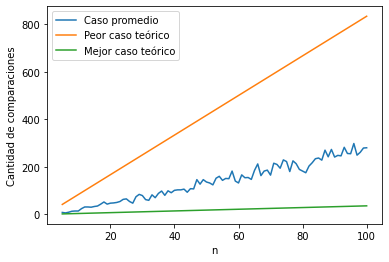

In [62]:
import matplotlib.pyplot as plt
import random
import math

x = [n for n in range(5,101)] 
y1 = [25*n/3 for n in range(5,101)] # Peor caso
y2 = [5*n/14 for n in range(5,101)] # Mejor caso
y = []; 

for n in range(5,101):
  c = 0
  A = random.sample(range(1, 101), n)
  select(A, 0, len(A)-1, 1)
  y.append(c)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Caso promedio", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de comparaciones')
plt.show()

### Análisis de resultados

...

## 5.2. Comparación con Randomized Select

A continuación se presenta un gráfico con el tiempo de ejecución de los algoritmos **Select** y **Randomized Select**. Este último realiza una elección del pivote aleatoria para particionar el arreglo.

In [135]:
from random import randint

def random_select(A, i):
  k = i-1
  p = randint(0, len(A)-1)
  q = partition(A, p)

  if k == q: return A[q]
  if k < q: return random_select(A[:q], i)
  return random_select(A[q+1:], k-q)

i = 2
A = [1,8,6,5,4,9,7]
x = select(A, i)
print(f"El estadístico de orden {i} es {x}")

El estadístico de orden 2 es 4


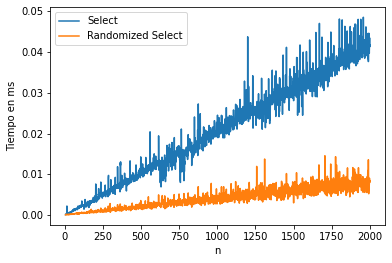

In [148]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y1=[]; y2=[];

for n in range(5,2001):
  A = random.sample(range(1, 2001), n)

  t1 = repeat(setup="from __main__ import select", stmt=f"select({A}, {1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import random_select", stmt=f"random_select({A}, {1})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Podemos apreciar que ambos algoritmos tienen una complejidad temporal promedio de $O(n)$. Además, el algoritmo Randomized Select parece ser mucho más eficiente que el algoritmo Select. Esto podría deberse a la gran cantidad de operaciones adicionales que utiliza Select para encontrar la mediana.

Podríamos haber pensado que el algoritmo Select era más eficiente, puesto que realiza una mejor elección del pivote que optimiza el tiempo total ocupado por la función partition. También podríamos considerar que el peor caso para Randomized Select es $O(n^2)$, si por ejemplo, buscamos el estadístico de orden 1, y escogemos como pivote el elemento mayor del arreglo en cada iteración. Sin embargo, la probabilidad de que ocurra este caso es prácticamente nula, pues la elección del pivote es completamente aleatoria, por lo que cada elemento tiene la misma probabilidad de ser escogido como pivote.

Así como Randomized Select puede escoger particiones con un mayor número de elementos que Select, es decir, una partición con más de $\frac{7n}{10}$ elementos, también podría escogerse una partición con menos de $\frac{3n}{10}$ elementos, realizando una menor cantidad de llamadas recursivas a la función en comparación a Select. El peor caso mencionado anteriormente para Randomized Select, en el que escogemos el mayor elemento como pivote, podría también ser el mejor caso si buscamos el estadístico de orden $n$.

En conclusión, la aleatoriedad de Randomized Select aumenta de igual manera la probabilidad de ocurrencia de un peor y de un mejor caso. Considerando además todas las constantes ocultas en el tiempo de ejecución de Select, es de esperar que Randomized Select sea un algoritmo más eficiente.
